In [13]:
""" K-Means clustering.

Process overview:
(0) Load data, normalize
(1) Pick k random points as centroids
(2) Reassign points based on their nearest centroid
(3) Recompute centroid
(4) Repeat until no assignments change

IMPROVEMENT IDEAS: better seeding, different distance fnc, find optimal K using ELBo and
cross-validation, ...
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729


[]

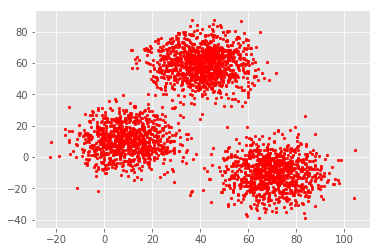

In [157]:
# Read in data
data = pd.read_csv('../data/clara.txt', names=['V1', 'V2'])
print(data.head())

# # Normalize
data = (data - data.mean())/data.std()
print(data.head())

# Visualize
plt.scatter(data['V1'], data['V2'], s=7, c='r')
plt.plot()

In [158]:
def dist(a, b, ax=1):
    """ Distance function (Frobenius/Euclidean norm, or the sum of the 
    absolute values of each of the items in a matrix) """
    return np.linalg.norm(a - b, axis=ax)

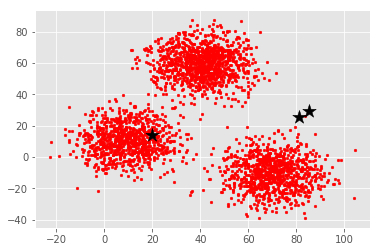

In [161]:
# Combine features
x = np.array(data)

# Set number of clusters
k = 3

# Pick centroids randomly
C = np.random.random((k, x.shape[1])) * np.max(x)

# Plot
plt.scatter(data['V1'], data['V2'], s=7, c='r')
plt.scatter(C[:, 0], C[:, 1], c='k', s=200, marker='*')

70.58666229646246
20.602073373358078
1.197440091803179
0.04168093692023286
0.0


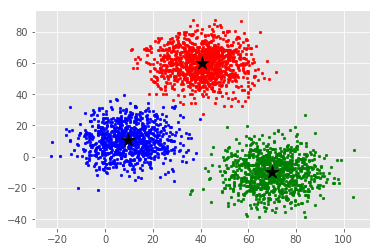

In [160]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(x))

# Compute error between current and previous iteration
error = dist(C, C_old, ax=None)

# Until convergence (no new assignments)
while error != 0:
    
    # Assign all points to a cluster based on closest centroid
    for i in range(len(x)):
        distances = dist(x[i], C)
        assignment = np.argmin(distances)
        clusters[i] = assignment

    # Deepcopy 
    C_old = np.array([i for i in C])

    # Reassign points
    for i in range(k):
        points = [x[j] for j in range(len(x)) if clusters[j]==i]
        C[i] = np.mean(points, axis=0)
    
    # Compute difference between old centroids and new centroids
    error = dist(C, C_old, None)
    print(error)
    
# Plot
fig, ax = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for c in range(k):
    points = np.array([x[j] for j in range(len(x)) if clusters[j] == c])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[c])
    
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='k')